# Convolutional Neural Network (CNN)
---
- 특정 이미지를 컴퓨터에게 보여주거나 이미지를 분류하는 모델을 만들 때는 이미지를 구성하는 픽셀 값을 Input으로 사용
- 일반적으로 머신러닝 모델을 적용할 때는 Input 변수가 서로 독립적이라는 가정이 있음 -> 독립 변수(Independent Variable)이라 부름. 
- 하지만 이미지의 픽셀 값은 서로 독립값이지 않다는 것을 직관적으로 알 수 있음. 
- 픽셀 값을 독립 변수로 늘어뜨려 Input으로 사용하는 것은 일반적인 머신러닝의 가정에 위배되는 행위였음. 
- 하지만 현실적으로 이렇게 사용할 수 밖에 없었고, 어느 정도 성능이 나오긴 했기에 이미지의 2차원 픽셀 값을 Vector로 Flatten해 Input으로 사용해옴. 

### Region Feature
- 앞서 언급했듯 이미지 픽셀을 Flatten해서 사용하면, 가까운 위치에 있는 픽셀들끼리의 정보를 전혀 반영하지 못함. 
- 이러한 지역 정보(Region Feature)를 학습할 수 있는 신경망 구조가 필요했고, 이를 **CNN이라고 함. (픽셀의 위치 정보까지 함께 학습)**

### CNN
- CNN은 Region Feature(Graphical Feature)를 학습시키기 위한 신경망 모형으로, Yann LeCun 교수가 1088년 제안함. 
- 숫자 손글씨를 분류하는 CNN 모형을 제안했지만, 학습 시간이 너무 오래 걸리고 신경망 모형이 지니고 있는 단점 때문에 많이 주목받지는 못함. 
- 2010년대 들어 알고리즘과 하드웨어의 발전으로 CNN이 이미지를 처리하는 신경망 모형으로 급부상함. 
- CNN은 기본적으로 아래와 같은 구조를 가짐. 
- Region Feature를 뽑아내는 Convolution Layer와 Feature Dimension을 위한 Pooling Layer, 그리고 최종적인 분류를 위한 (일반적인 MLP 구조를 갖는) Fully Connected Layer로 구성됨.  

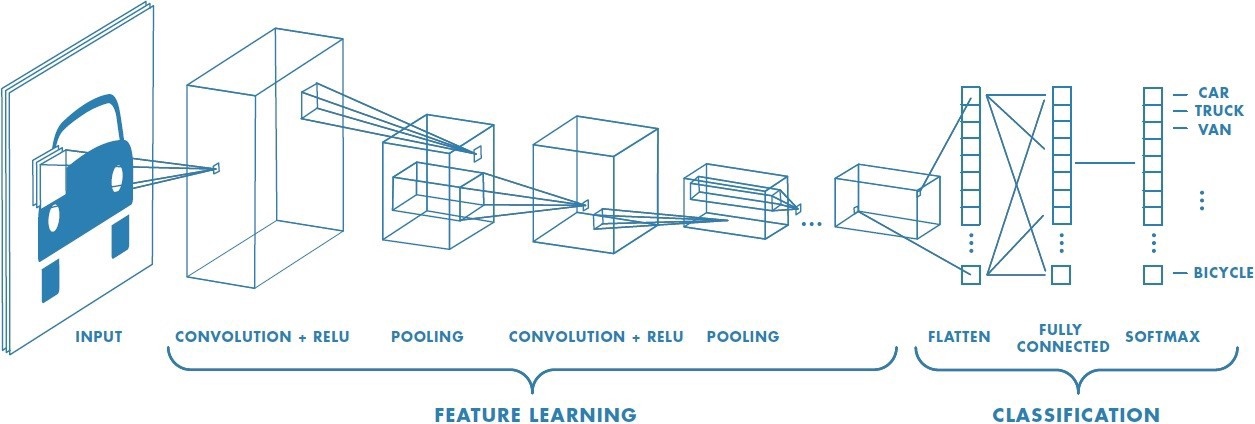

### Convolution Layer
- Receptive Field를 정의해 입력 층의 이미지의 Feature를 추출하는 역할을 담당함. 
- 아래 그림처럼 이미지가 Input으로 들어왔을 때 사각형 모양의 Receptive Field가 이미지를 스캔하면서 이미지의 Region Feature를 추출
- 이 때 이미지 픽셀 값, Receptive Field의 Weight의 선형 결합으로 1개의 값이 나옴.  

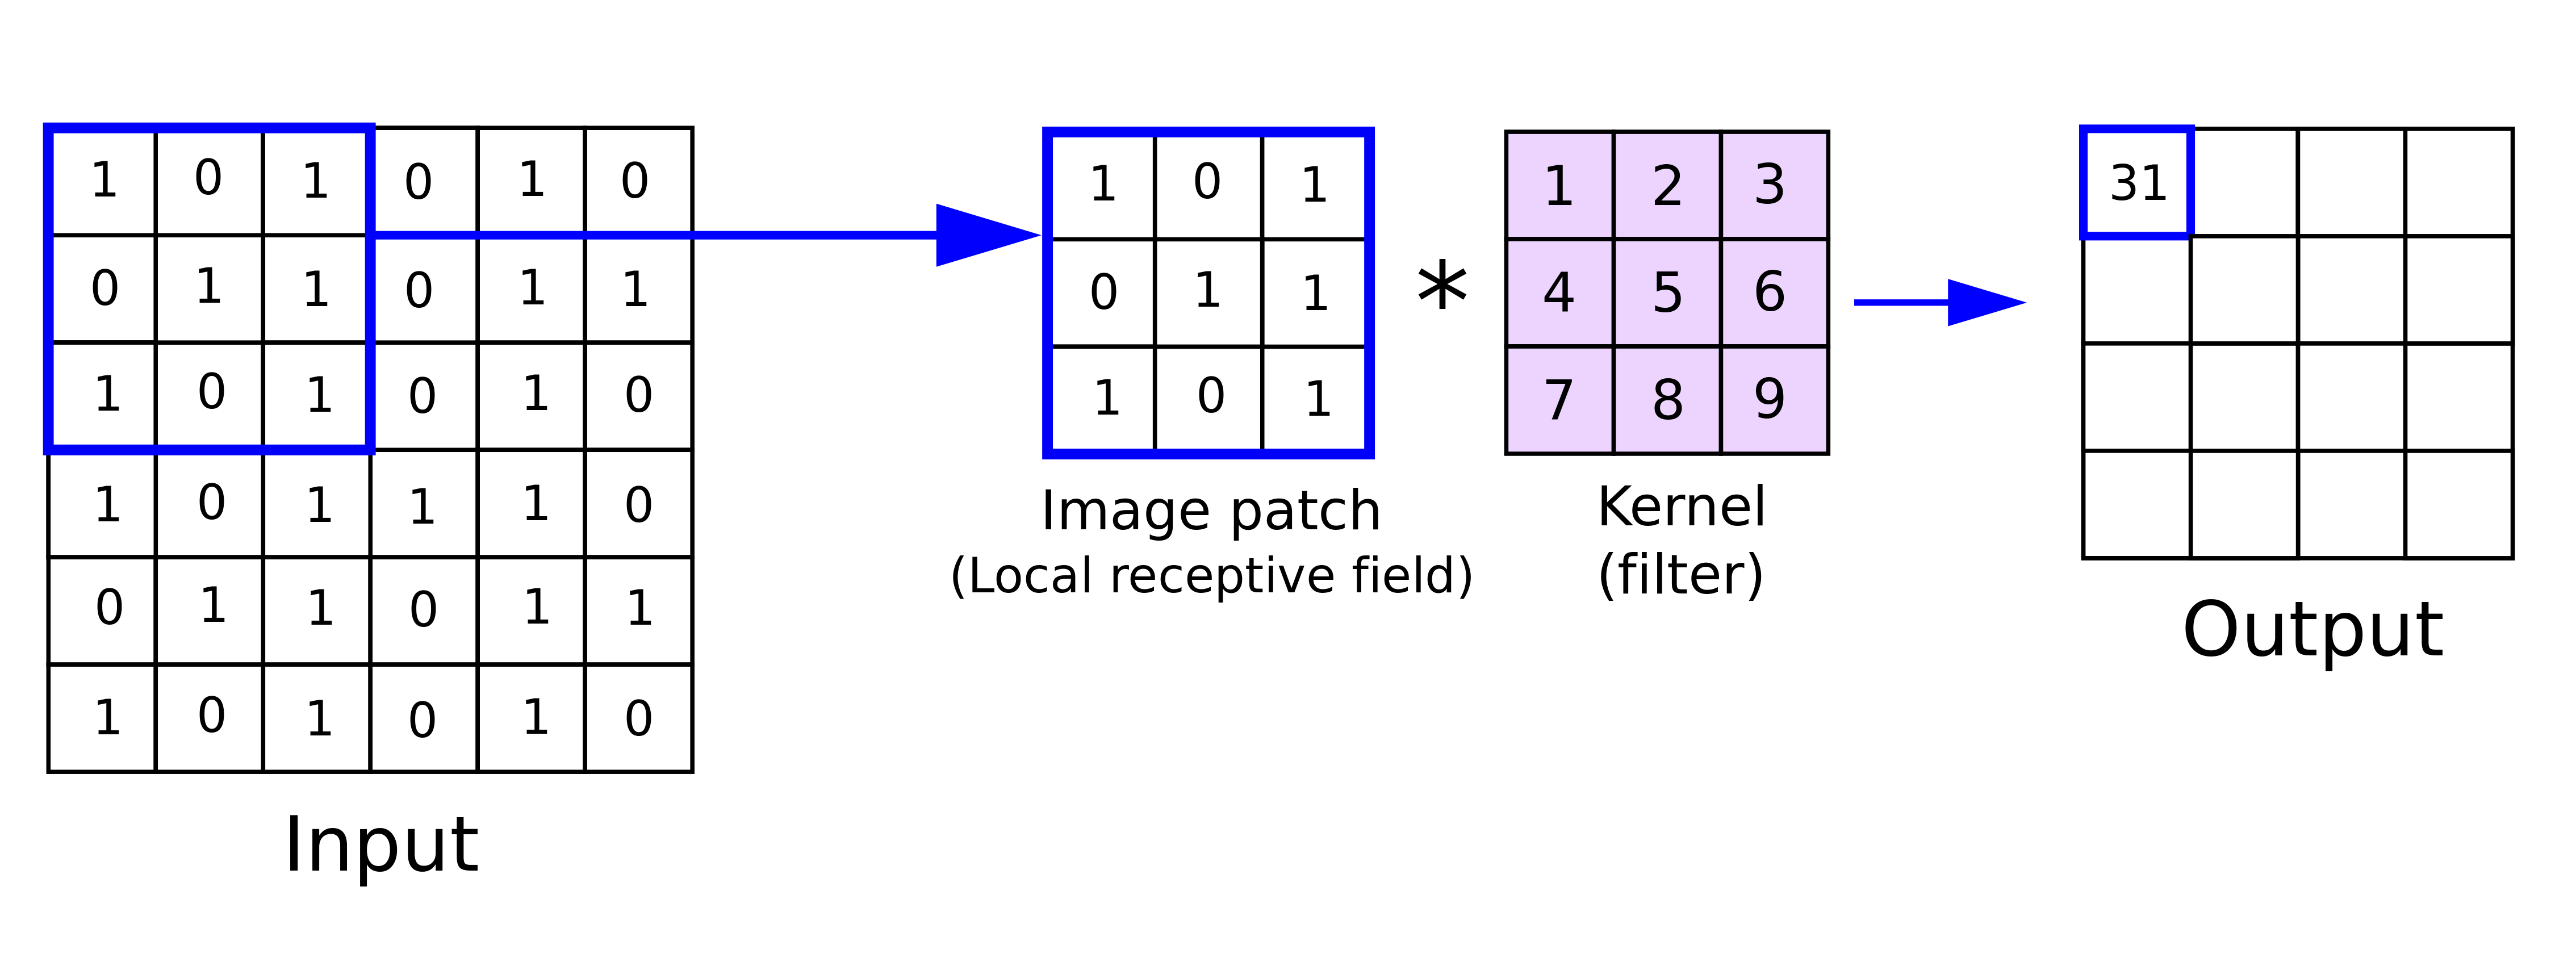

- 여기서 추출한 Feature를 Feature Map이라고 부름. 
- 여기서 Weight는 고정된 값이 아니라 신경망 모형을 이용해 학습하면서 바뀌는 값임. 
- CNN의 학습은 이미지를 잘 분류할 수 있도록 Feature를 추출해내는 Weight을 학습시키는 것임. 

### Stride
- Stride는 Convolution Layer에서 Receptive Field가 이미지를 돌면서 Feature를 뽑을 때 아래 그림과 같이 이동하는 칸 수를 의미함.  

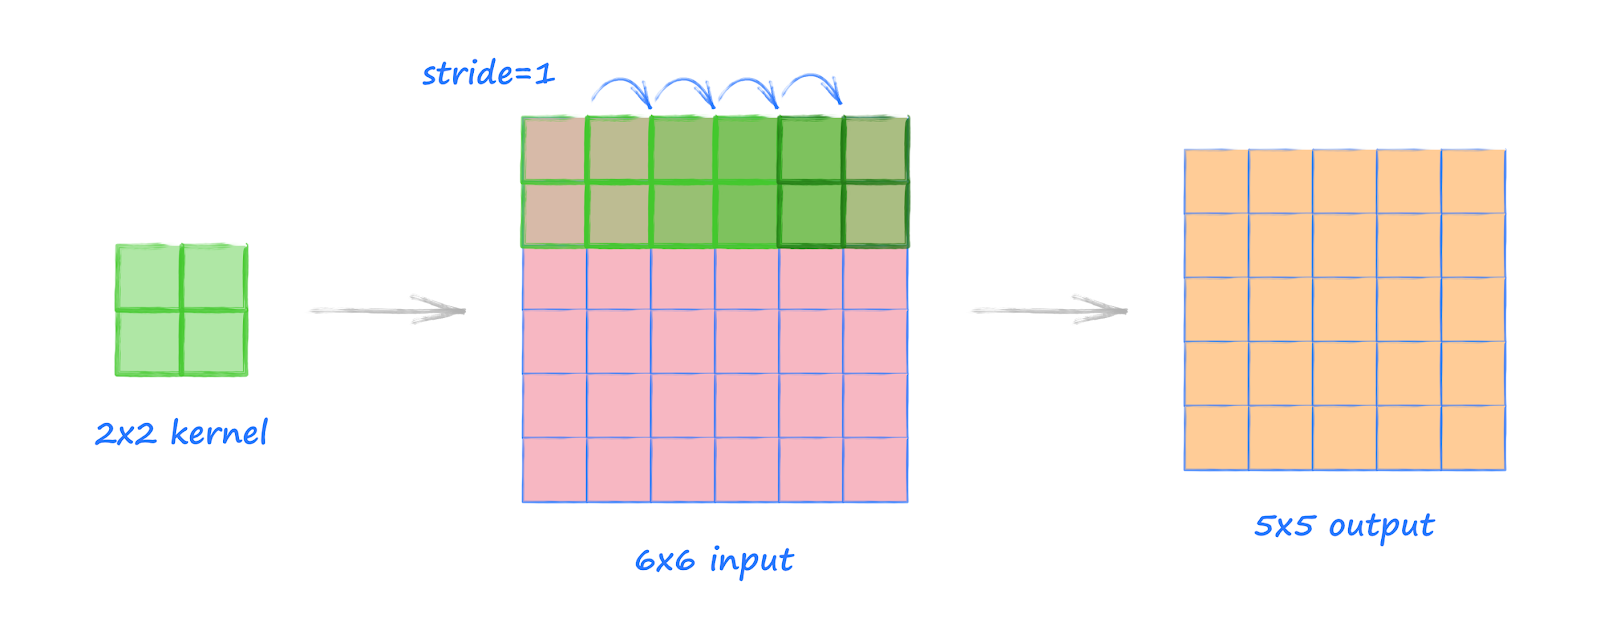

### Padding
- 일반적인 Convolution을 적용하면 다음 Image 또는 Feature의 Size가 줄어들고, 가장자리에 있는 픽셀 값은 안쪽에 있는 픽셀 값보다 적게 Convolution이 되는 단점이 있음. 
- Image Size를 줄이지 않고 모든 픽셀 값에 Convolution을 적용하기 위해 아래 그림처럼 Padding이라는 개념을 적용함. 
- 기본 이미지 사이즈의 테두리에 0값을 넣어 이미지의 사이즈를 유지하고 테두리에 있는 픽셀 값도 안에 있는 픽셀 값과 똑같이 Convolution을 거치도록 하는 것임.  

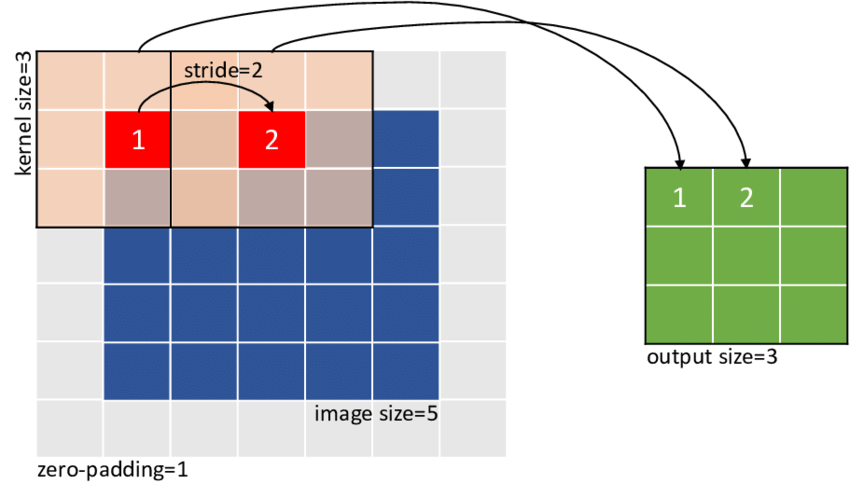

### Weight Sharing
- Convolution Layer에서 Receptive Field를 움직여가며 다음 Feature Map을 추출할 때, 다른 Weight로 Feature를 추출하려면 매우 많은 파라미터를 학습해야 함. 
- 많은 파라미터의 수를 줄이기 위해 CNN을 학습할 때는 Weight Sharing이라는 기법을 이용함. 
- https://i-am-eden.tistory.com/30 참고하자. 

### Pooling Layer
- 일반적으로 Image 또는 Feature의 Convolution을 거친 뒤 Pooling Layer를 거침. 
- Pooling이라는 개념은 Feature Size를 반으로 줄여주는 것임. 
- 아래 그림은 2 x 2 Stride Max Pooling을 적용한 것임. 
- Pooling Layer를 거치지 않으면 많은 파라미터를 학습시켜야하므로 학습 시간이 오래 걸림. 
- 즉, Pooling Layer의 개념은 CNN의 학습 속도를 향상시키기 위해 Feature의 Dimension을 줄이는 개념임. 
- 픽셀 중 최대값을 추출하는 것을 Max Pooling, 픽셀들의 평균을 계산해 추출하는 것을 Average Pooling이라고 함. 
- Pooling의 목적은 CNN의 학습 속도를 높이기 위해 Feature의 Dimension을 줄이는 것이기 때문에 정보의 손실이 불가피함. 
- 최근에는 최대한 정보를 활용하고 학습 속도를 높일 수 있는 알고리즘이 많이 개발되어 상황에 따라 Pooling Layer를 쓰지 않는 경우도 있다고 함.  

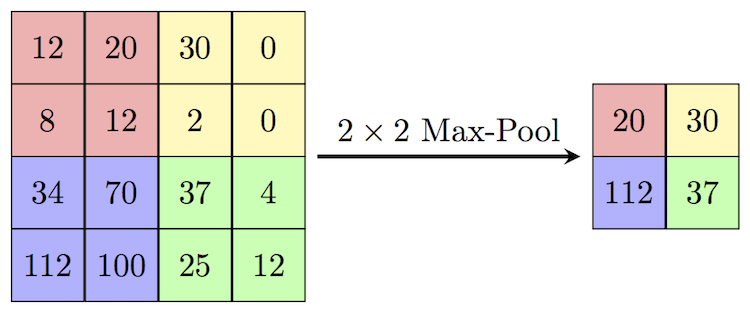

### Fully Connected Layer
- 일반적인 MLP 구조와 동일함. 
- Pooling Layer에서 나온 Feature를 Flatten해 MLP의 Input으로 놓고 학습을 진행함. 
- 기본적인 CNN의 구조는 Convolution - Pooling - Convolutoin - Pooling - Fully Connected Layer와 같은 구조를 지님. 
- 여기서 Convolution의 Receptive Field 크기와 Stride, Pooling의 종류, Layer를 쌓는 횟수 등 모두 사용자가 지정해야 하는 하이퍼파라미터임. 
- 하이퍼파라미터를 튜닝하면 잘된다라는 것은 정해져 있지 않음. 파라미터의 종류가 많아지면 과적합이 발생할 확률이 높고, 복잡한 모델에 적합하다는 일반적인 머신러닝의 개념을 갖고 디자인함. 최적의 하이퍼파라미터를 알기는 어렵기에, 다양한 시도를 통해 최적의 모델을 만들어가는 것이 중요함.  

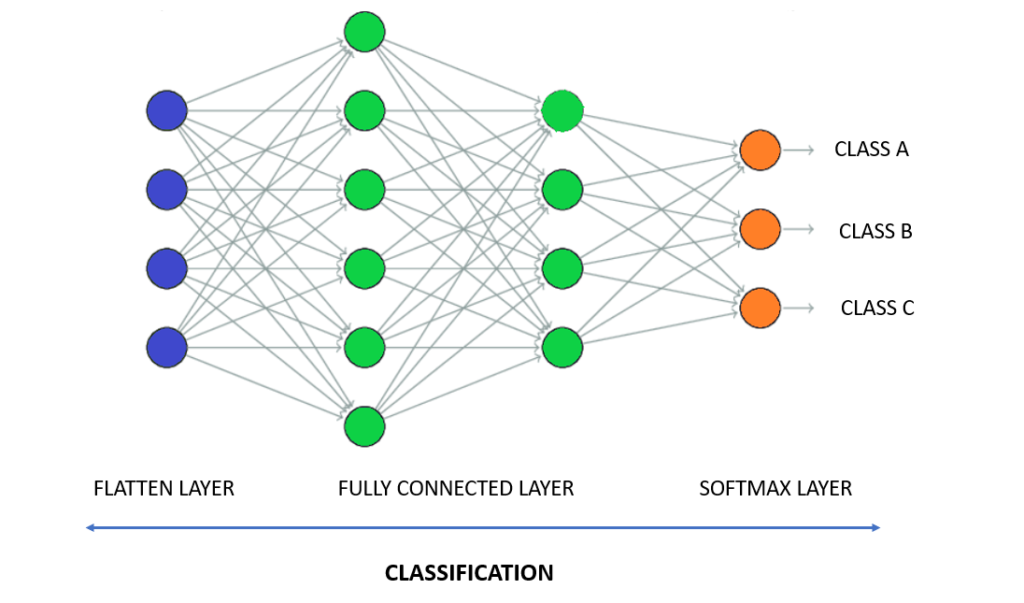

## CIFAR-10 데이터를 이용해 MLP 설계하기
---
- CIFAR-10 Dataset은 토론토 대학교에서 제공하고 있으며, 많은 논문의 실험 대상으로 사용되고 있음. 
- 10개의 클래스로 구성되어 있으며, 각 클래스별 5000장의 학습 데이터셋과 1000장의 검증 데이터셋으로 구성됨. 

In [1]:
'''1. Module Import'''

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [2]:
'''2. 딥러닝 모델을 설계할 때 활용하는 장비 확인'''

if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
    
print('Using PyTorch version: ', torch.__version__, 'Device: ', DEVICE)

Using PyTorch version:  1.11.0 Device:  cuda


In [3]:
BATCH_SIZE = 32
EPOCH = 10

In [4]:
'''3. CIFAR-10 데이터 다운로드 (train, test split)'''

train_dataset = datasets.CIFAR10(root="../data/CIFAR_10",
                                train=True,
                                download=True,
                                transform=transforms.ToTensor())

test_dataset = datasets.CIFAR10(root="../data/CIFAR_10",
                               train=False,
                               transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size=BATCH_SIZE,
                                         shuffle=False)

Files already downloaded and verified


In [5]:
'''4. 데이터 확인하기 (1)'''

for (X_train, y_train) in train_loader:
    print('X_train: ', X_train.size(), 'type: ', X_train.type())
    print('y_train: ', y_train.size(), 'type: ', y_train.type())
    break

X_train:  torch.Size([32, 3, 32, 32]) type:  torch.FloatTensor
y_train:  torch.Size([32]) type:  torch.LongTensor


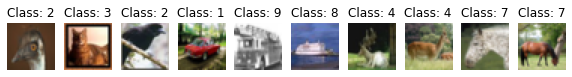

In [6]:
'''5. 데이터 확인하기 (2)'''

pltsize = 1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.axis('off')
    plt.imshow(np.transpose(X_train[i], (1, 2, 0)))
    plt.title('Class: ' + str(y_train[i].item()))

In [7]:
'''6. Multi Layer Perceptron(MLP) 모델 설계하기'''

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
    
    def forward(self, x):
        x = x.view(-1, 32*32*3)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        
        return x

In [8]:
'''7. Optimizer, Objective Function 설정하기'''

model = Net().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [9]:
'''8. MLP 모델 학습을 진행하며 학습 데이터에 대한 모델 성능을 확인하는 함수 정의'''

def train(mode, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{}({:.0f}%)]\tTrain Loss: {:.6f}".format(Epoch, 
                                                                                batch_idx*len(image),
                                                                               len(train_loader.dataset),
                                                                               100.*batch_idx/len(train_loader),
                                                                               loss.item()))

In [10]:
'''9. 학습되는 과정 속에서 검증 데이터에 대한 모델 성능을 확인하는 함수 정의'''

def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim=True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
            
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    
    return test_loss, test_accuracy

In [11]:
'''10. MLP 학습을 실행하며 Train, Test set의 Loss 및 Test set Accuracy 확인하기'''

for Epoch in range(1, EPOCH+1):
    train(model, train_loader, optimizer, log_interval=200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(Epoch,
                                                                                   test_loss,
                                                                                   test_accuracy))

Train Epoch: 1 [0/50000(0%)]	Train Loss: 2.297625
Train Epoch: 1 [6400/50000(13%)]	Train Loss: 2.127435
Train Epoch: 1 [12800/50000(26%)]	Train Loss: 1.969963
Train Epoch: 1 [19200/50000(38%)]	Train Loss: 1.668063
Train Epoch: 1 [25600/50000(51%)]	Train Loss: 1.760292
Train Epoch: 1 [32000/50000(64%)]	Train Loss: 1.761208
Train Epoch: 1 [38400/50000(77%)]	Train Loss: 1.663511
Train Epoch: 1 [44800/50000(90%)]	Train Loss: 1.576942

[EPOCH: 1], 	Test Loss: 0.0526, 	Test Accuracy: 39.53 % 

Train Epoch: 2 [0/50000(0%)]	Train Loss: 1.335417
Train Epoch: 2 [6400/50000(13%)]	Train Loss: 1.809131
Train Epoch: 2 [12800/50000(26%)]	Train Loss: 1.595497
Train Epoch: 2 [19200/50000(38%)]	Train Loss: 1.530626
Train Epoch: 2 [25600/50000(51%)]	Train Loss: 1.662490
Train Epoch: 2 [32000/50000(64%)]	Train Loss: 1.432784
Train Epoch: 2 [38400/50000(77%)]	Train Loss: 1.298759
Train Epoch: 2 [44800/50000(90%)]	Train Loss: 1.288511

[EPOCH: 2], 	Test Loss: 0.0513, 	Test Accuracy: 41.49 % 

Train Epoch: 3

## CIFAR-10 데이터를 이용해 Convolutional Neural Network (CNN) 설계하기
---
- 이미지를 MLP 모델에 Input으로 사용할 때 1차원으로 펼쳐 이용하면 이미지 내에 지역적인 특징을 반영할 수 없는 한계점이 있음. 
- MNIST 같은 경우 덜 민감하지만, CIFAR-10 데이터는 컬러 이미지이기 때문에 이미지의 특징을 잃는 것에 더욱 민감함. 
- 따라서 이미지를 1차원으로 펼쳐 Input으로 이용하는 것이 아니라 이미지와 주변 픽셀의 조합을 통해 특징을 추출하고자 하는 CNN을 구현해보자. 

In [12]:
'''6. Convolutional Neural Network(CNN) 모델 설계하기'''

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        # 2차원의 이미지 데이터를 nn.Conv2d 메서드를 이용해 Convolution 연산을 하는 Filter를 정의
        self.conv1 = nn.Conv2d(in_channels=3,    # 채널 수를 이미지의 채널 수와 동일하게 맞춰야 함. rgb에 대해 동시에 conv 연산을 위함. 
                              out_channels=8,    # conv 연산을 진행하는 Filter의 개수 설정. Filter 개수만큼 Output의 depth가 정해짐. 
                              kernel_size=3,    # Filter의 크기를 설정.
                              padding=1)
        
        self.conv2 = nn.Conv2d(in_channels=8,    # 위에서 Filter Map의 Depth는 8이므로 채널 수 8로 설정
                              out_channels=16,
                              kernel_size=3,
                              padding=1)
        
        self.pool = nn.MaxPool2d(kernel_size=2,
                                stride=2)
        
        self.fc1 = nn.Linear(8*8*16, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)
        
        
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        
        x = x.view(-1, 8*8*16)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x)
        
        return x

In [13]:
'''7. Optimizer, Objective Function 설정하기'''

model = CNN().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

print(model)

CNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)


In [14]:
'''10. MLP 학습을 실행하며 Train, Test set의 Loss 및 Test set Accuracy 확인하기'''

for Epoch in range(1, EPOCH+1):
    train(model, train_loader, optimizer, log_interval=200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(Epoch,
                                                                                   test_loss,
                                                                                   test_accuracy))

Train Epoch: 1 [0/50000(0%)]	Train Loss: 2.313015


/tmp/ipykernel_46/3768305337.py:40: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)


Train Epoch: 1 [6400/50000(13%)]	Train Loss: 2.000898
Train Epoch: 1 [12800/50000(26%)]	Train Loss: 1.935840
Train Epoch: 1 [19200/50000(38%)]	Train Loss: 1.587148
Train Epoch: 1 [25600/50000(51%)]	Train Loss: 1.620356
Train Epoch: 1 [32000/50000(64%)]	Train Loss: 1.595562
Train Epoch: 1 [38400/50000(77%)]	Train Loss: 1.796657
Train Epoch: 1 [44800/50000(90%)]	Train Loss: 1.673953

[EPOCH: 1], 	Test Loss: 0.0465, 	Test Accuracy: 45.15 % 

Train Epoch: 2 [0/50000(0%)]	Train Loss: 1.365928
Train Epoch: 2 [6400/50000(13%)]	Train Loss: 1.643250
Train Epoch: 2 [12800/50000(26%)]	Train Loss: 1.417399
Train Epoch: 2 [19200/50000(38%)]	Train Loss: 1.202105
Train Epoch: 2 [25600/50000(51%)]	Train Loss: 1.298942
Train Epoch: 2 [32000/50000(64%)]	Train Loss: 1.291692
Train Epoch: 2 [38400/50000(77%)]	Train Loss: 1.356902
Train Epoch: 2 [44800/50000(90%)]	Train Loss: 1.365886

[EPOCH: 2], 	Test Loss: 0.0415, 	Test Accuracy: 52.35 % 

Train Epoch: 3 [0/50000(0%)]	Train Loss: 0.981558
Train Epoch: 3

- 기존에 설계한 MLP 모델은 48% 수준에 그친 반면, Convolution 연산을 추가한 CNN 모델은 성능이 약 65% 수준으로 향상됨. 